In [9]:
import tweepy
from tweepy import OAuthHandler
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
def What_to_Search_Twitter(search):
    consumer_key = "x"
    consumer_secret = "x"
    access_token = "x"
    access_token_secret = "x"

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit = True)

    tweet_list = []
    tweet_data = []

    for tweet in tweepy.Cursor(api.search,q= search,count=25,
                               lang="en").items():
        tweet_list.append(tweet.text)
        tweet_data.append(tweet)
        if len(tweet_list) > 100:
            break
            
            
    def tweets_df(results):
        id_list = [tweet.id for tweet  in results]
        data_set = pd.DataFrame(id_list, columns = ["id"])

        data_set["text"] = [tweet.text for tweet in results]
        data_set["created_at"] = [tweet.created_at for tweet in results]
        data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
        data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
        data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
        data_set["user_location"] = [tweet.author.location for tweet in results]
        data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
        
        return data_set
    
    tweet_data = tweets_df(tweet_data)
    
    


    #    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])





    tokens = []
    sentiment_calc = {"compound": 0 , "neg": 0, "neu": 0, "pos": 0}
    sentiment_count = {"compound": 0 , "neg": 0, "neu": 0, "pos": 0}

    #tweets = data["text"].tolist()
    #
    #for tweet in tweets:
    #    tokens.append(word_tokenize(tweet))


    sid = SentimentIntensityAnalyzer()

    for sentence in tweet_list:
        ss = sid.polarity_scores(sentence)
        for k in sorted(ss):
    #        print('{0}: {1}, '.format(k, ss[k]), end='')
            sentiment_calc[k] = sentiment_calc[k] + ss[k]
            if ss[k] > 0:
                sentiment_count[k] = sentiment_count[k] + 1
                
#    print(sentiment_calc)
#    print(sentiment_count)

    figgg = plt.figure(figsize = [11 , 4])
    figgg.add_subplot(2,2,2)
    
    graph = pd.Series(sentiment_count)

    graph.plot.bar()
    return plt.show()
        
        
        
   
        
        

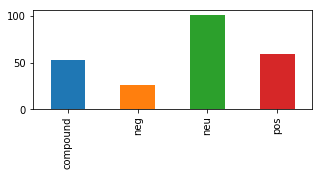

In [38]:
What_to_Search_Twitter("walmart")